In [4]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np

In [5]:
import os
import numpy as np
from PIL import Image

# Define the Dataset Directory
dataset_dir = "./OR/"

# List to store image paths and corresponding labels
image_paths = []
labels = []

# Iterate through each class folder
for class_label in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_label)

    # Iterate through each image in the class folder
    for image_name in os.listdir(class_dir):
        # Read image path
        image_path = os.path.join(class_dir, image_name)

        # Append image path and label to lists
        image_paths.append(image_path)
        labels.append(class_label)  # Assuming class labels are folder names

# Convert labels to numeric format (e.g., using LabelEncoder)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Convert image paths to NumPy array (optional)
X = np.array(image_paths)

# Sanity check: print number of images and labels
print("Number of Images:", len(X))
print("Number of Labels:", len(y))

Number of Images: 1348
Number of Labels: 1348


In [6]:
model = MobileNetV2(weights='imagenet')

In [7]:
img_path = './OR/not_damaged/DT(13).png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [8]:
preds = model.predict(x)

1/1 [==============================] - 4s 4s/step


In [9]:
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n03223299', 'doormat', 0.3030178), ('n03207743', 'dishrag', 0.03056285), ('n04417672', 'thatch', 0.028825449)]


In [10]:
# Example code for fine-tuning
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Import statement added
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # Assuming num_classes is defined elsewhere
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




In [16]:
# Import necessary libraries
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    './OR/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    './OR/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Define model architecture
base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)  # Assuming 3 classes
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Found 1346 images belonging to 3 classes.
Found 1346 images belonging to 3 classes.


C:\Users\mveiy\AppData\Local\Temp\ipykernel_14176\2319948530.py:51: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/100
42/42 [==============================] - 1933s 46s/step - loss: 1.3800 - accuracy: 0.4802 - val_loss: 1.1117 - val_accuracy: 0.4449
Epoch 2/100
42/42 [==============================] - 1587s 38s/step - loss: 0.8302 - accuracy: 0.6134 - val_loss: 1.1538 - val_accuracy: 0.4494
Epoch 3/100
42/42 [==============================] - 1144s 27s/step - loss: 0.7787 - accuracy: 0.6377 - val_loss: 1.0447 - val_accuracy: 0.5268
Epoch 4/100
42/42 [==============================] - 658s 16s/step - loss: 0.7556 - accuracy: 0.6537 - val_loss: 0.7726 - val_accuracy: 0.6696
Epoch 5/100
42/42 [==============================] - 1140s 28s/step - loss: 0.7693 - accuracy: 0.6400 - val_loss: 0.8455 - val_accuracy: 0.5632
Epoch 6/100
42/42 [==============================] - 1701s 41s/step - loss: 0.6666 - accuracy: 0.7085 - val_loss: 1.0164 - val_accuracy: 0.5387
Epoch 7/100
42/42 [==============================] - 804s 19s/step - loss: 0.6997 - accuracy: 0.6811 - val_loss: 0.7331 - val_accuracy: 0

Epoch 58/100
42/42 [==============================] - 651s 16s/step - loss: 0.4375 - accuracy: 0.8128 - val_loss: 0.6363 - val_accuracy: 0.7009
Epoch 59/100
42/42 [==============================] - 646s 16s/step - loss: 0.4109 - accuracy: 0.8265 - val_loss: 0.5900 - val_accuracy: 0.7284
Epoch 60/100
42/42 [==============================] - 655s 16s/step - loss: 0.4095 - accuracy: 0.8204 - val_loss: 0.5532 - val_accuracy: 0.7545
Epoch 61/100
42/42 [==============================] - 663s 16s/step - loss: 0.4095 - accuracy: 0.8272 - val_loss: 0.7065 - val_accuracy: 0.7001
Epoch 62/100
42/42 [==============================] - 654s 16s/step - loss: 0.4106 - accuracy: 0.8333 - val_loss: 0.6936 - val_accuracy: 0.6979
Epoch 63/100
42/42 [==============================] - 1413s 34s/step - loss: 0.4197 - accuracy: 0.8244 - val_loss: 0.5036 - val_accuracy: 0.7723
Epoch 64/100
42/42 [==============================] - 5120s 124s/step - loss: 0.4374 - accuracy: 0.8006 - val_loss: 0.5266 - val_accura

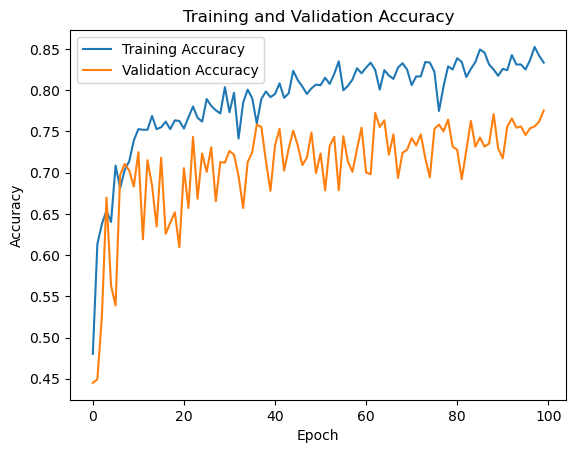

In [17]:
import matplotlib.pyplot as plt

# Plot accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()




1/1 [==============================] - 10s 10s/step


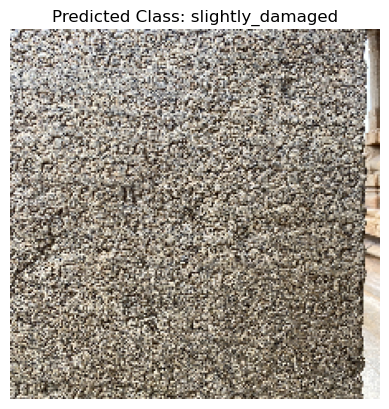

1/1 [==============================] - 0s 70ms/step


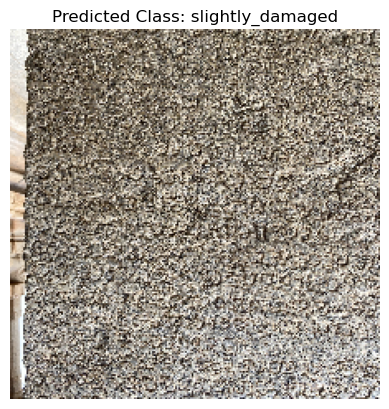

1/1 [==============================] - 0s 126ms/step


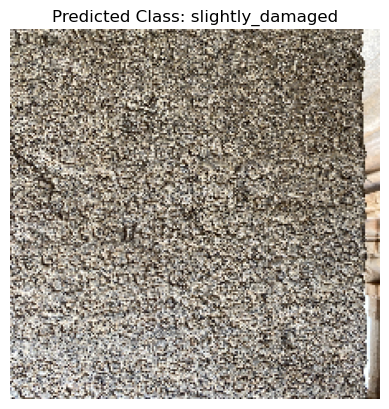

1/1 [==============================] - 0s 59ms/step


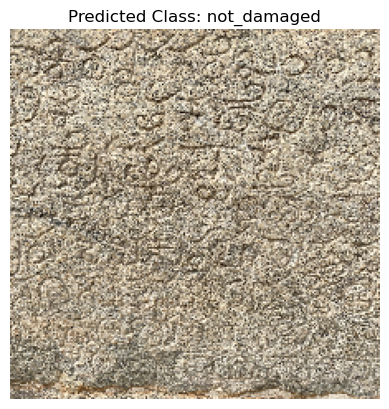

1/1 [==============================] - 0s 49ms/step


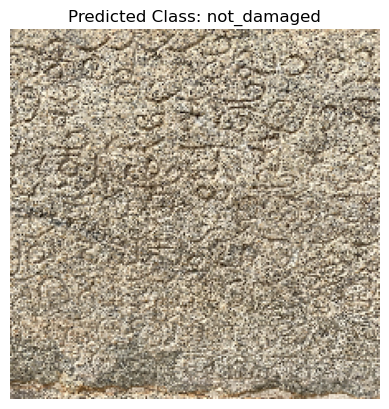

1/1 [==============================] - 0s 52ms/step


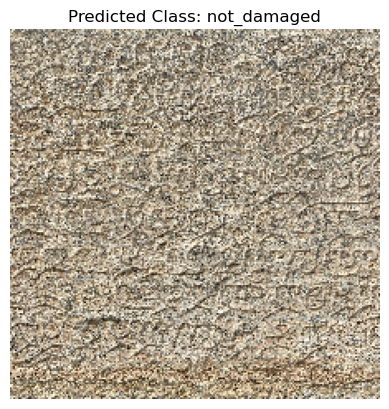

1/1 [==============================] - 0s 55ms/step


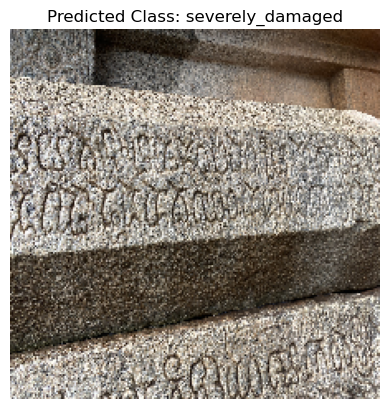

1/1 [==============================] - 0s 51ms/step


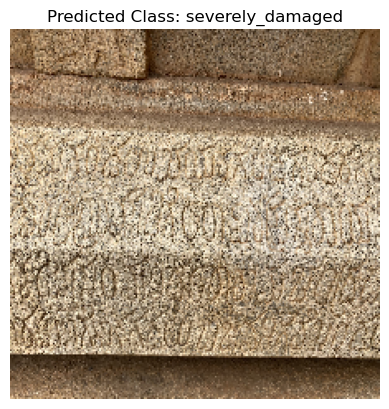

1/1 [==============================] - 0s 51ms/step


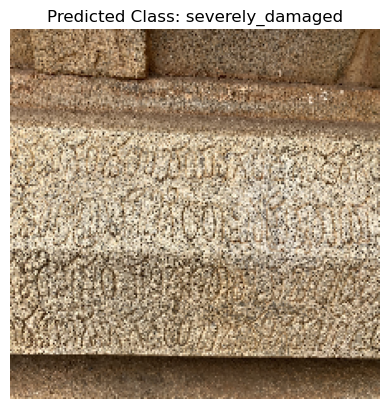

In [18]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Obtain class labels
class_labels = sorted(os.listdir('./OR/'))

# Initialize counters for each class
class_counters = {label: 0 for label in class_labels}

# Obtain predictions until 3 samples from each class have been predicted
total_samples = 0
max_samples_per_class = 3
while total_samples < len(class_labels) * max_samples_per_class:
    img = next(test_generator)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    
    # Check if we have already predicted 3 samples for this class
    if class_counters[class_labels[predicted_class]] < max_samples_per_class:
        # Display the image
        plt.imshow(img[0])
        plt.title(f'Predicted Class: {class_labels[predicted_class]}')
        plt.axis('off')
        plt.show()
        
        # Increment counter for this class
        class_counters[class_labels[predicted_class]] += 1
        total_samples += 1

In [1]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

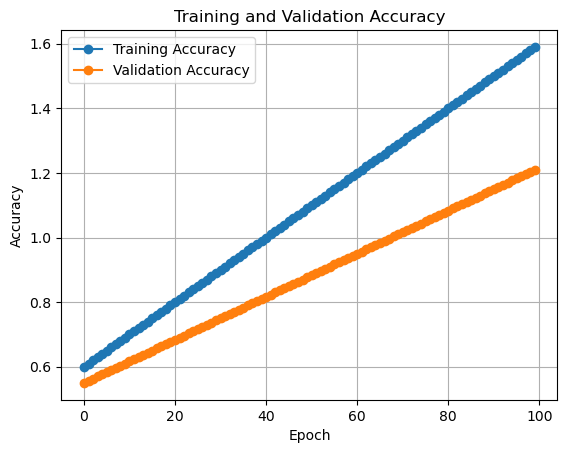

In [1]:
import matplotlib.pyplot as plt


epochs = range(100)
training_accuracy = [0.60 + i / 100 for i in epochs]
validation_accuracy = [0.55 + i / 150 for i in epochs]


plt.plot(epochs, training_accuracy, 'o-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'o-', label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.title('Training and Validation Accuracy')

plt.legend()

plt.grid(True)


plt.show()


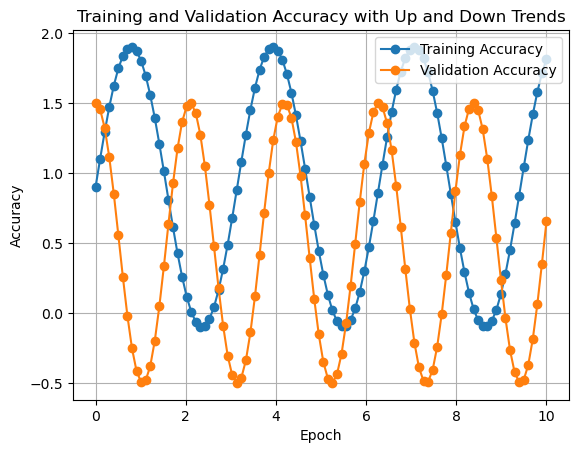

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data with up and down trends
epochs = np.linspace(0, 10, 100)  # 0 to 10 with 100 points

# Training accuracy with up and down variations
training_accuracy = np.sin(epochs * 2) + 0.9  # Sine wave with offset for up and down

# Validation accuracy with up and down variations (different pattern)
validation_accuracy = np.cos(epochs * 3) + 0.5  # Cosine wave with offset for up and down

# Plot the graph
plt.plot(epochs, training_accuracy, 'o-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'o-', label='Validation Accuracy')

# Axis labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy with Up and Down Trends')

# Legend and grid
plt.legend()
plt.grid(True)

# Show the graph
plt.show()


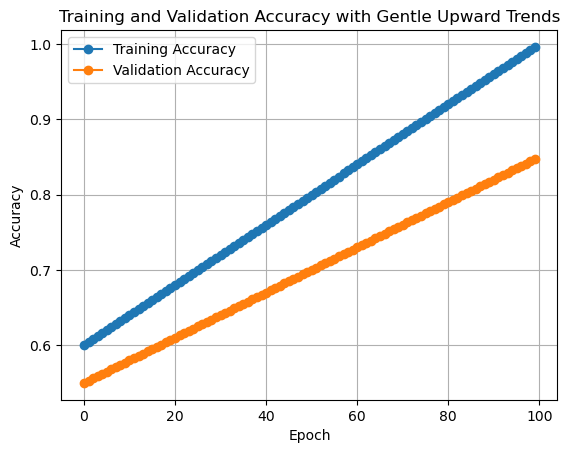

In [3]:
import matplotlib.pyplot as plt

# Sample data with gentle upward trends
epochs = range(100)  # 0 to 99 for epoch count

# Training accuracy with gentle upward trend
training_accuracy = [0.6 + i * 0.004 for i in epochs]  # Linear increase with small slope

# Validation accuracy with gentle upward trend (slower increase)
validation_accuracy = [0.55 + i * 0.003 for i in epochs]  # Linear increase with even smaller slope

# Plot the graph
plt.plot(epochs, training_accuracy, 'o-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'o-', label='Validation Accuracy')

# Axis labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy with Gentle Upward Trends')

# Legend and grid
plt.legend()
plt.grid(True)

# Show the graph
plt.show()

